# Wrap-up Quiz - Linear Models
**This quiz requires some programming to be answered.**

Open the dataset `ames_housing_no_missing.csv` with the following command:

In [1]:
import pandas as pd

ames_housing = pd.read_csv("https://raw.githubusercontent.com/bilals/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

`ames_housing` is a pandas dataframe. The column “SalePrice” contains the target variable.

To simplify this exercise, we will only used the numerical features defined below:

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

Start by fitting a ridge regressor (`sklearn.linear_model.Ridge`) fixing the penalty `alpha` to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument `return_estimator=True` in sklearn.`model_selection.cross_validate` to access all fitted estimators fitted on each fold. Use an instance of `sklearn.preprocessing.StandardScaler` to scale the data before passing it to the regressor.

## Question 1
How large is the largest absolute value of the weight (coefficient) in this trained model?

a) Lower than 1.0 (1e0)

**b) Between 1.0 (1e0) and 100,000.0 (1e5)**

c) Larger than 100,000.0 (1e5)

*Select a single answer*

Hint: Note that the estimator fitted in each fold of the cross-validation procedure is a pipeline object. To access the coefficients of the `Ridge` model at the last position in a pipeline object, you can use the expression `pipeline[-1].coef_` for each pipeline object fitted in the cross-validation procedure. The `-1` notation is a negative index meaning “last position”.

In [6]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
# Create the pipeline:
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1e-6))

# Perform 10-fold cross-validation
# return_estimator=True ensures the fitted pipelines for each fold are returned
cv_results = cross_validate(
    pipeline,
    data_numerical,
    target,
    cv=10,
    return_estimator=True,
    scoring="neg_mean_squared_error",
)

# Extract the fitted estimators (pipelines)
fitted_pipelines = cv_results["estimator"]

# Get the coefficients from the Ridge model in each pipeline and find the maximum absolute value
max_abs_coef = 0.0

for fold_idx, pipeline in enumerate(fitted_pipelines):
    # The Ridge model is the last step in the pipeline (index -1)
    ridge_model = pipeline[-1]

    # Get the coefficients (weights)
    coefficients = ridge_model.coef_

    # Calculate the largest absolute coefficient for this fold
    max_abs_coef_fold = np.max(np.abs(coefficients))

    # Update the overall maximum absolute coefficient
    if max_abs_coef_fold > max_abs_coef:
        max_abs_coef = max_abs_coef_fold


print(f"The largest absolute value of a weight (coefficient) across all folds is: {max_abs_coef:.2f}")


The largest absolute value of a weight (coefficient) across all folds is: 22653.81
Selected answer: b) Between 1.0 (1e0) and 100,000.0 (1e5)


## Question 2

Repeat the same experiment by fitting a ridge regressor (`sklearn.linear_model.Ridge`) with the default parameter (i.e. `alpha=1.0`).

How large is the largest absolute value of the weight (coefficient) in this trained model?

a) Lower than 1.0

**b) Between 1.0 and 100,000.0**

c) Larger than 100,000.0

*Select a single answer*

In [7]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
# Create the pipeline:
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Perform 10-fold cross-validation
# return_estimator=True ensures the fitted pipelines for each fold are returned
cv_results = cross_validate(
    pipeline,
    data_numerical,
    target,
    cv=10,
    return_estimator=True,
    scoring="neg_mean_squared_error",
)

# Extract the fitted estimators (pipelines)
fitted_pipelines = cv_results["estimator"]

# Get the coefficients from the Ridge model in each pipeline and find the maximum absolute value
max_abs_coef = 0.0

for fold_idx, pipeline in enumerate(fitted_pipelines):
    # The Ridge model is the last step in the pipeline (index -1)
    ridge_model = pipeline[-1]

    # Get the coefficients (weights)
    coefficients = ridge_model.coef_

    # Calculate the largest absolute coefficient for this fold
    max_abs_coef_fold = np.max(np.abs(coefficients))

    # Update the overall maximum absolute coefficient
    if max_abs_coef_fold > max_abs_coef:
        max_abs_coef = max_abs_coef_fold


print(f"The largest absolute value of a weight (coefficient) across all folds is: {max_abs_coef:.2f}")

The largest absolute value of a weight (coefficient) across all folds is: 22562.77


## Question 3

What are the two most important features used by the ridge regressor? You can make a box-plot of the coefficients across all folds to get a good insight.

a) "`MiscVal`" and "`BsmtFinSF1`"

**b) "`GarageCars`" and "`GrLivArea`"**

c) "`TotalBsmtSF`" and "`GarageCars`"

*Select a single answer*

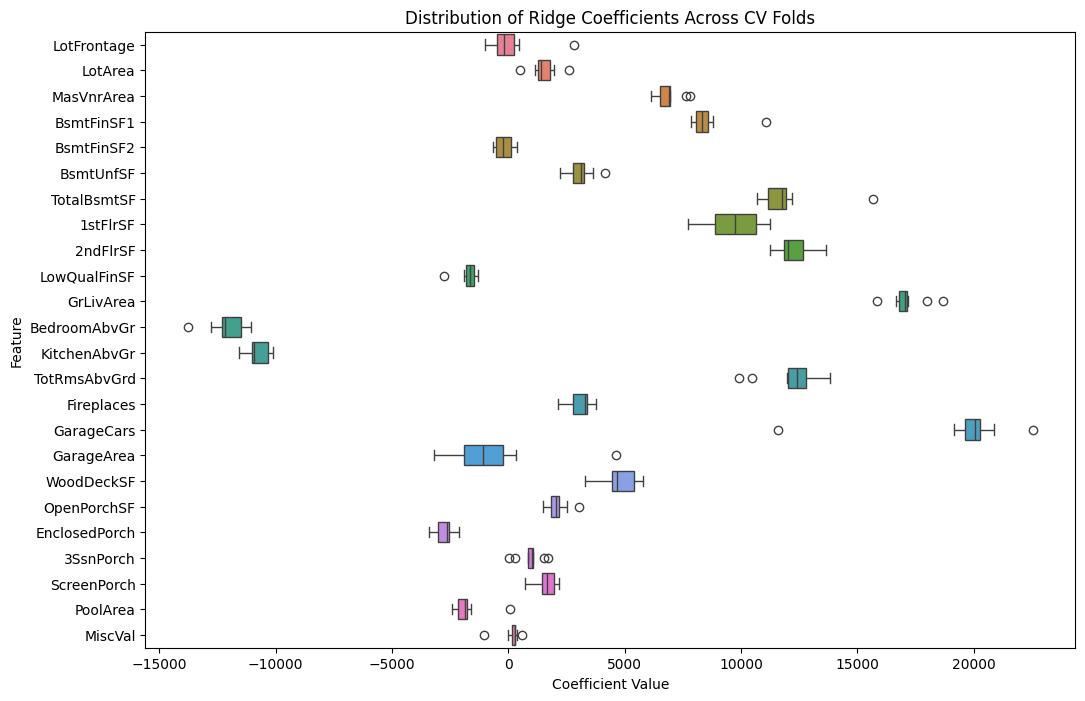

Mean absolute coefficients across all folds (most important features first):
GarageCars      19417.910189
GrLivArea       17119.540942
2ndFlrSF        12201.988699
TotRmsAbvGrd    12152.055864
BedroomAbvGr    12117.822236
dtype: float64


In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients from each fitted pipeline
all_coefficients = []
for pipeline in fitted_pipelines:
    all_coefficients.append(pipeline[-1].coef_)

# Create a DataFrame from the coefficients
coefficients_df = pd.DataFrame(all_coefficients, columns=data_numerical.columns)

# Create a box plot of the coefficients
plt.figure(figsize=(12, 8))
sns.boxplot(data=coefficients_df, orient="h")
plt.title("Distribution of Ridge Coefficients Across CV Folds")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Calculate the mean absolute coefficient for each feature to identify the most important ones
mean_abs_coefficients = coefficients_df.abs().mean().sort_values(ascending=False)

print("Mean absolute coefficients across all folds (most important features first):")
print(mean_abs_coefficients.head())

## Question 4

Remove the feature "`GarageArea`" from the dataset and repeat the previous experiment.


What is the impact on the weights of removing "`GarageArea`" from the dataset?

a) None

b) Completely changes the order of the most important features

**c) Decreases the standard deviation (across CV folds) of the "`GarageCars`" coefficient**

*Select all answers that apply*

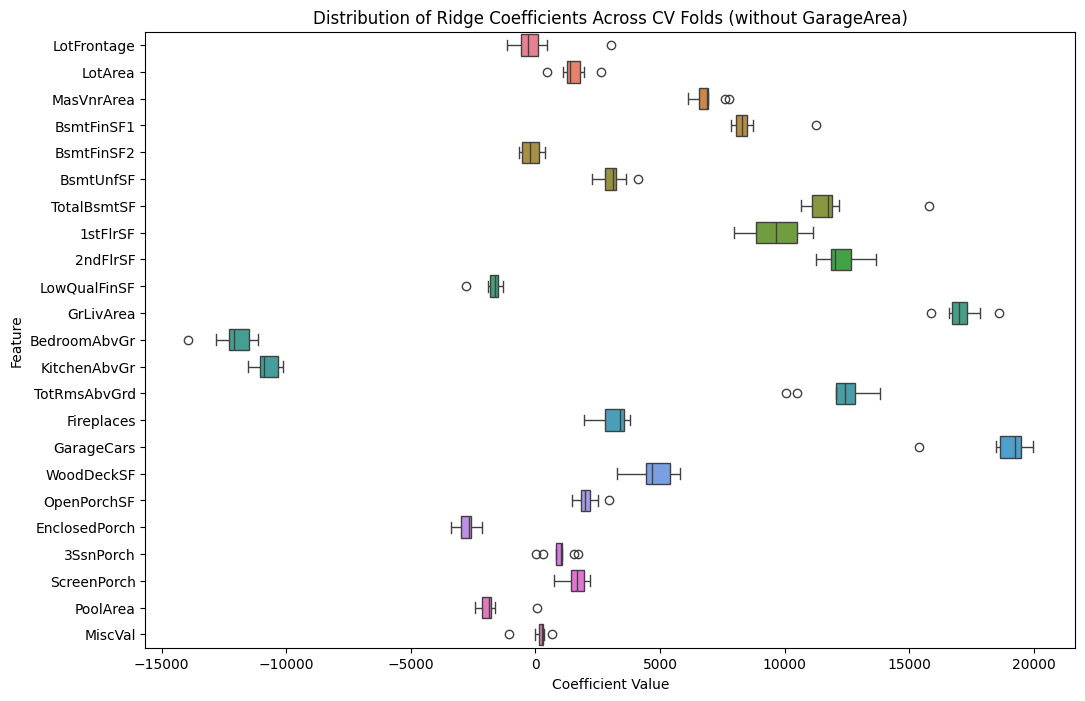

Mean absolute coefficients across all folds (most important features first, without GarageArea):
GarageCars      18844.224327
GrLivArea       17085.525852
2ndFlrSF        12204.026989
TotRmsAbvGrd    12197.772347
BedroomAbvGr    12120.585498
dtype: float64

Standard deviation of 'GarageCars' coefficient (without GarageArea): 1307.69


In [9]:
# Define numerical features excluding 'GarageArea'
numerical_features_no_garagearea = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical_no_garagearea = data[numerical_features_no_garagearea]

# Create the pipeline with Ridge(alpha=0)
pipeline_no_garagearea = make_pipeline(StandardScaler(), Ridge(alpha=1e-6))


# Perform 10-fold cross-validation
cv_results_no_garagearea = cross_validate(
    pipeline_no_garagearea,
    data_numerical_no_garagearea,
    target,
    cv=10,
    return_estimator=True,
    scoring="neg_mean_squared_error",
)

# Extract the fitted estimators (pipelines)
fitted_pipelines_no_garagearea = cv_results_no_garagearea["estimator"]

# Extract coefficients from each fitted pipeline
all_coefficients_no_garagearea = []
for pipeline in fitted_pipelines_no_garagearea:
    all_coefficients_no_garagearea.append(pipeline[-1].coef_)

# Create a DataFrame from the coefficients
coefficients_df_no_garagearea = pd.DataFrame(all_coefficients_no_garagearea, columns=data_numerical_no_garagearea.columns)

# Create a box plot of the coefficients
plt.figure(figsize=(12, 8))
sns.boxplot(data=coefficients_df_no_garagearea, orient="h")
plt.title("Distribution of Ridge Coefficients Across CV Folds (without GarageArea)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Calculate the mean absolute coefficient for each feature to identify the most important ones
mean_abs_coefficients_no_garagearea = coefficients_df_no_garagearea.abs().mean().sort_values(ascending=False)

print("Mean absolute coefficients across all folds (most important features first, without GarageArea):")
print(mean_abs_coefficients_no_garagearea.head())

# Calculate the standard deviation of the 'GarageCars' coefficient across folds
std_garagecars_no_garagearea = coefficients_df_no_garagearea['GarageCars'].std()

print(f"\nStandard deviation of 'GarageCars' coefficient (without GarageArea): {std_garagecars_no_garagearea:.2f}")

## Question 5

What is the main reason for observing the previous impact on the most important weight(s)?

a) Both garage features are correlated and are carrying similar information

b) Removing the `“GarageArea”` feature reduces the noise in the dataset

c) Just some random effects

*Select a single answer*



## Question 6

Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a `sklearn.linear_model.RidgeCV` instead of a `Ridge` regressor on the numerical data without the "`GarageArea`" column. Pass `alphas=np.logspace(-3, 3, num=101)` to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

a) The variability does not change after tuning alpha

b) The variability decreased after tuning alpha

c) The variability increased after tuning alpha

*Select a single answer*

In [ ]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

# removed : "GarageArea"

data_numerical = data[numerical_features]

## Question 7

Check the parameter `alpha_` (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does `alpha_` fall into for most folds?

a) between 0.1 and 1

b) between 1 and 10

c) between 10 and 100

d) between 100 and 1000

*Select a single answer*

## Question 8

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.

In [ ]:
adult_census = pd.read_csv("https://raw.githubusercontent.com/bilals/scikit-learn-mooc/main/datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

How many numerical features are present in the dataset contained in the variable `data`?

a) 3

b) 4

c) 5

*Select a single answer*

## Question 9

Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold `cross-validation`:

* a linear model composed of a `StandardScaler` and a `LogisticRegression`

* a `DummyClassifier` predicting the most frequent class

By comparing the `cross-validation` test scores of both models fold-to-fold, count the number of times the linear model has a better test score than the dummy classifier Select the range which this number belongs to:

a) [0, 3]: the linear model is substantially worse than the dummy classifier

b) [4, 6]: both models are almost equivalent

c) [7, 10]: the linear model is substantially better than the dummy classifier

*Select a single answer*

## Question 10

What is the most important feature seen by the logistic regression?

a) "`age`"

b) "`capital-gain`"

c) "`capital-loss`"

d) "`hours-per-week`"

*Select a single answer*

## Question 11

Now, we will work with **both numerical and categorical features**. You can load Adult Census with the following snippet:

In [ ]:
adult_census = pd.read_csv("https://raw.githubusercontent.com/bilals/scikit-learn-mooc/main/datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

Create a predictive model where the categorical data must be one-hot encoded, the numerical data must be scaled, and the predictor is a logistic regression classifier.

Use the same 10-fold cross-validation strategy as above to evaluate this complex pipeline.

Look at the cross-validation test scores for both models and count the number of times the model using both numerical and categorical features has a better test score than the model using only numerical features. Select the range which this number belongs to:

a) [0, 3]: the model using both numerical and categorical features is substantially worse than the model using only numerical features

b) [4, 6]: both models are almost equivalent

c) [7, 10]: the model using both numerical and categorical features is substantially better than the model using only numerical features

*Select a single answer*

## Question 12

For the following questions, you can use the following snippet to get the feature names after the preprocessing performed.

In [ ]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"].get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

There is as many feature names as coefficients in the last step of your predictive pipeline.

Which of the following pair of features is most impacting the predictions of the logistic regression classifier based on the relative magnitude of its coefficients?

a) "`hours-per-week`" and "`native-country_Columbia`"

b) "`workclass_?`" and "`native_country_?`"

c) "`capital-gain`" and "`education_Doctorate`"

*Select a single answer*

## Question 13

What is the effect of decreasing the `C` parameter on the coefficients?

a) shrinking the magnitude of the weights towards zeros

b) increasing the magnitude of the weights

c) reducing the weights’ variance

d) increasing the weights’ variance

e) it has no influence on the weights’ variance

*Select all answers that apply*

## Further Readings
For more info on the importance of feature scaling when applying regularization on linear models:

https://inria.github.io/scikit-learn-mooc/python_scripts/linear_models_regularization.html

For a discussion on the effect of changing the `C` parameter:

https://inria.github.io/scikit-learn-mooc/python_scripts/linear_models_ex_04.html

